# Ultra Diffuse Galaxies Data Analysis

### Imports

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from IPython.display import clear_output

from cube_cut import cut_cube
from run_barycentric import barycentric_correction
from spectra_stacker_gen2 import spectra_stack
from ppxf_kinematics import ppxf_kinematics

warnings.filterwarnings('ignore')

### step 1: clean spectra

['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/F8D1_GC1/kb210114_00074_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/F8D1_GC1/kb210114_00075_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/F8D1_GC1/kb210114_00076_ocubes.fits']
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/F8D1_GC1/kb210114_00074_ocubes.fits 3279.0
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/F8D1_GC1/kb210114_00075_ocubes.fits 3279.0
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/F8D1_GC1/kb210114_00076_ocubes.fits 3279.0
The beginning and ending wavelength cuts for the cube are 304.00 and 2297.00 respectively


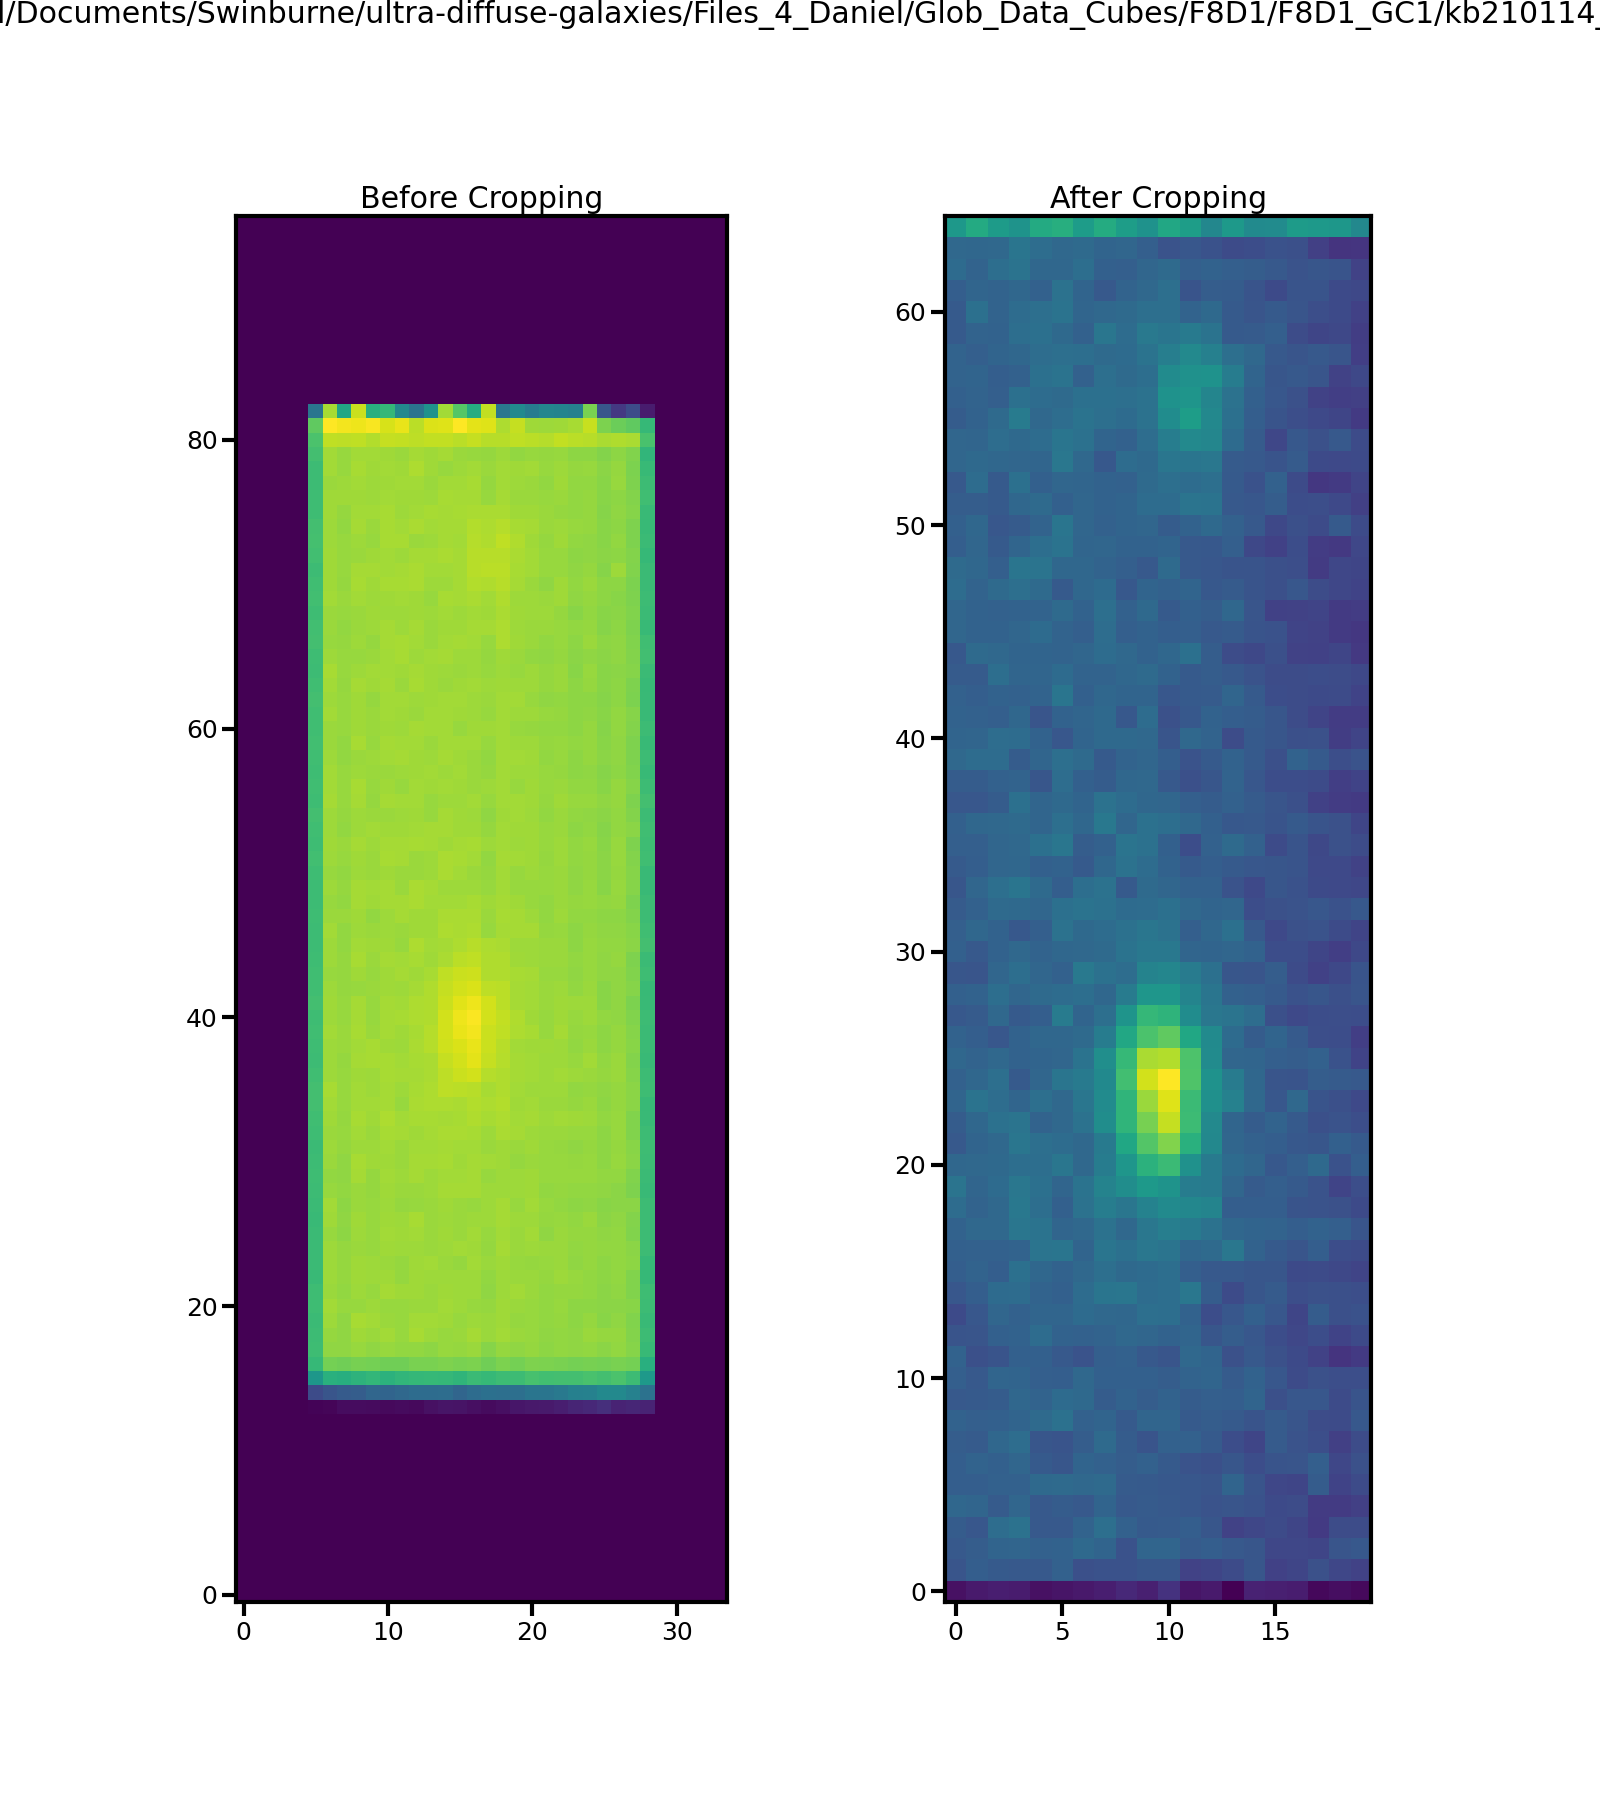

Files Written out


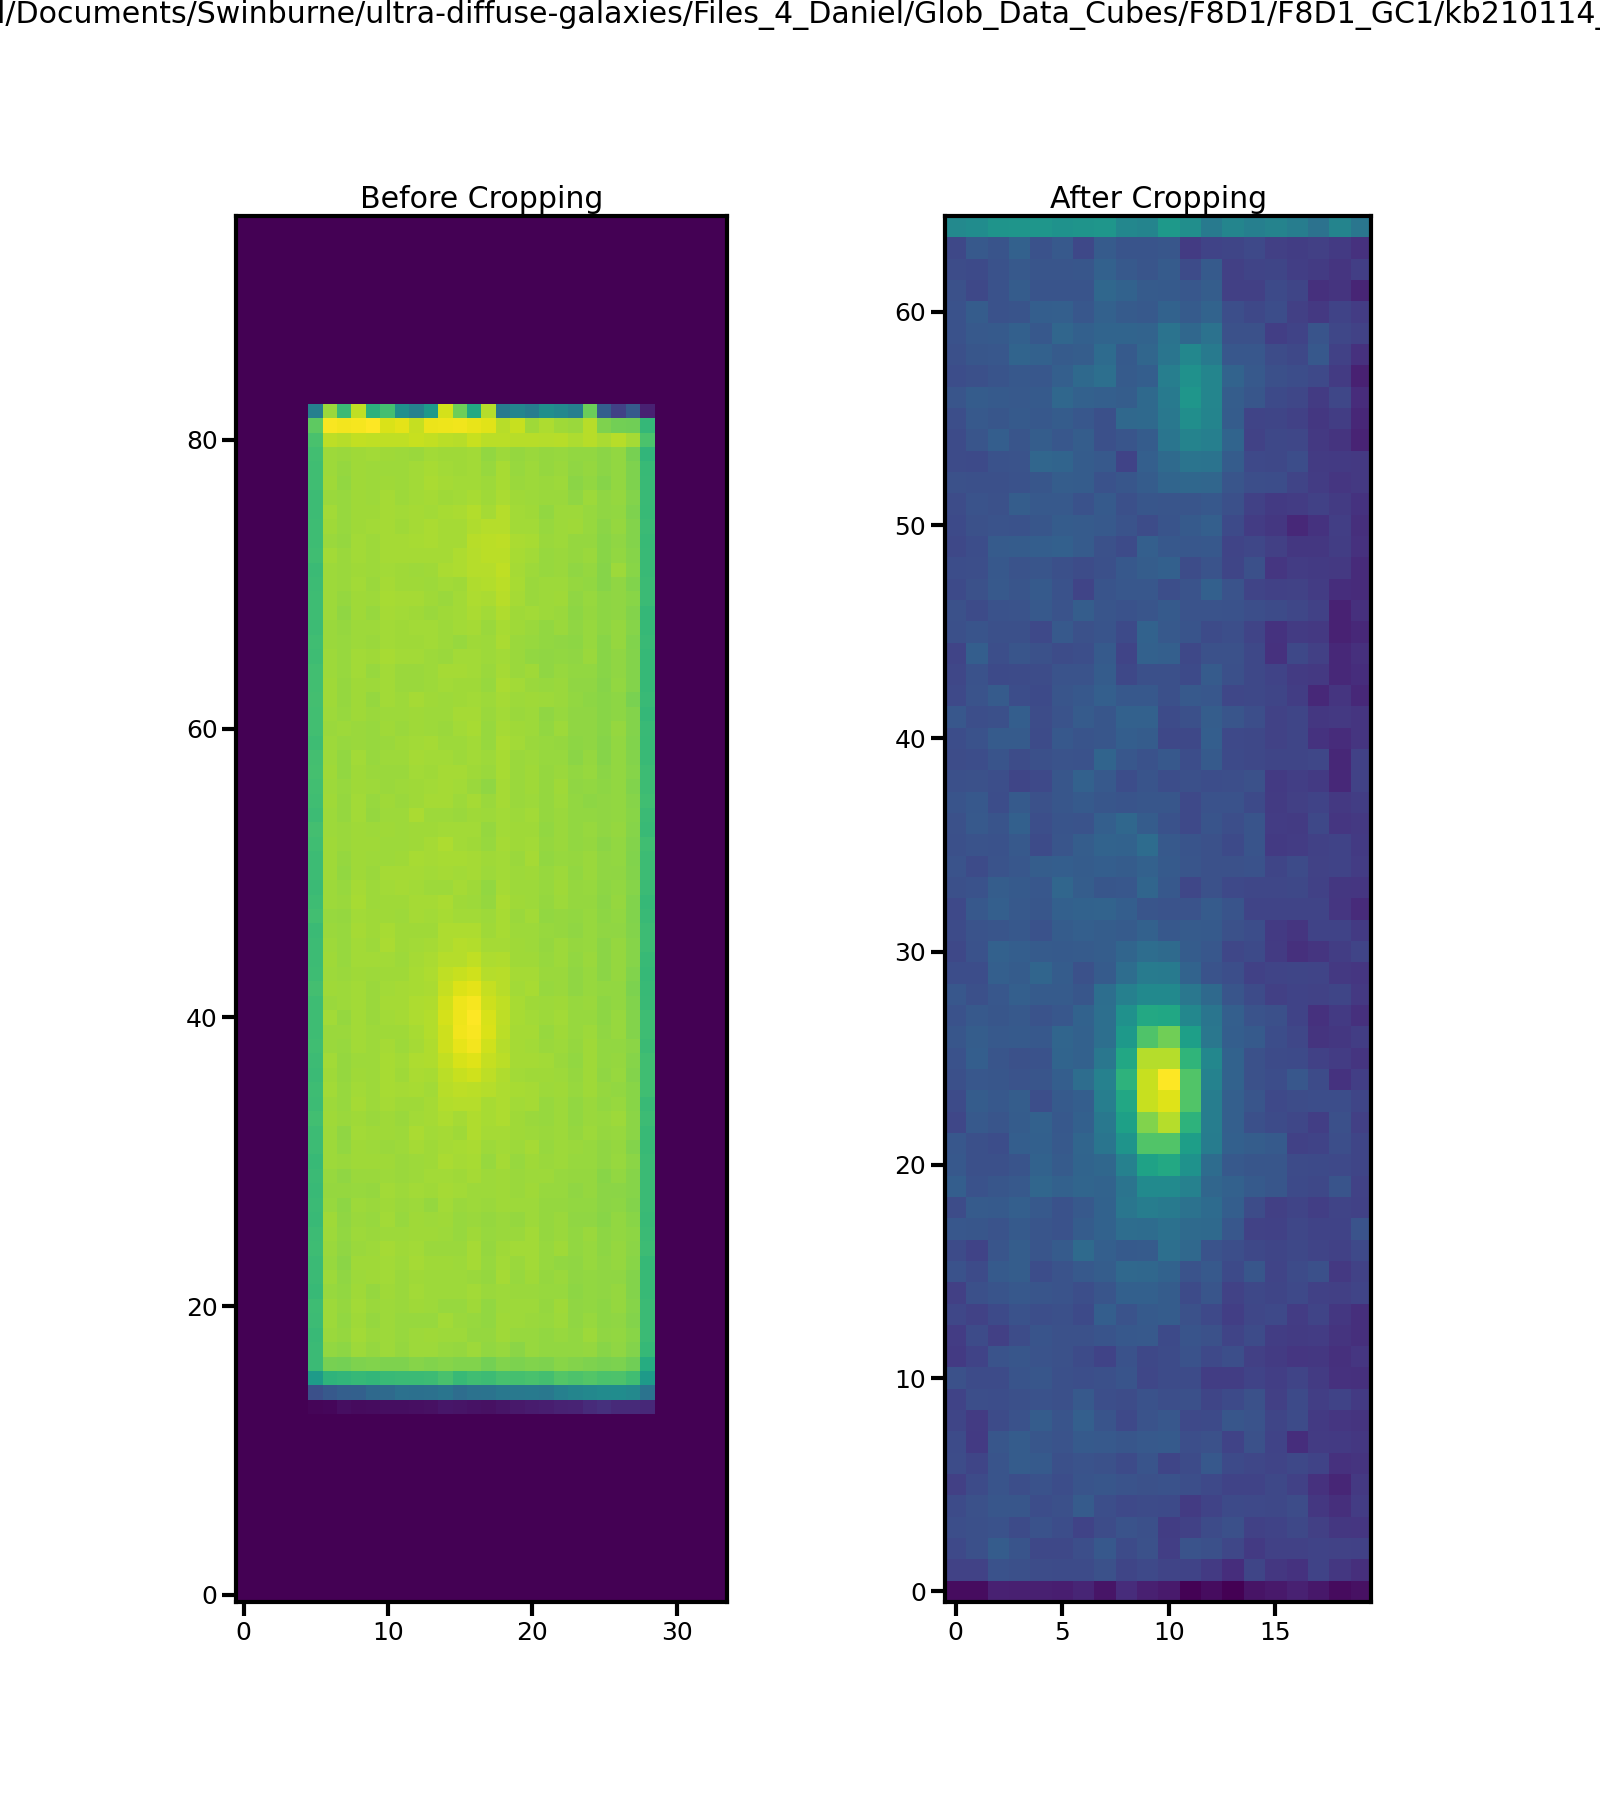

Files Written out


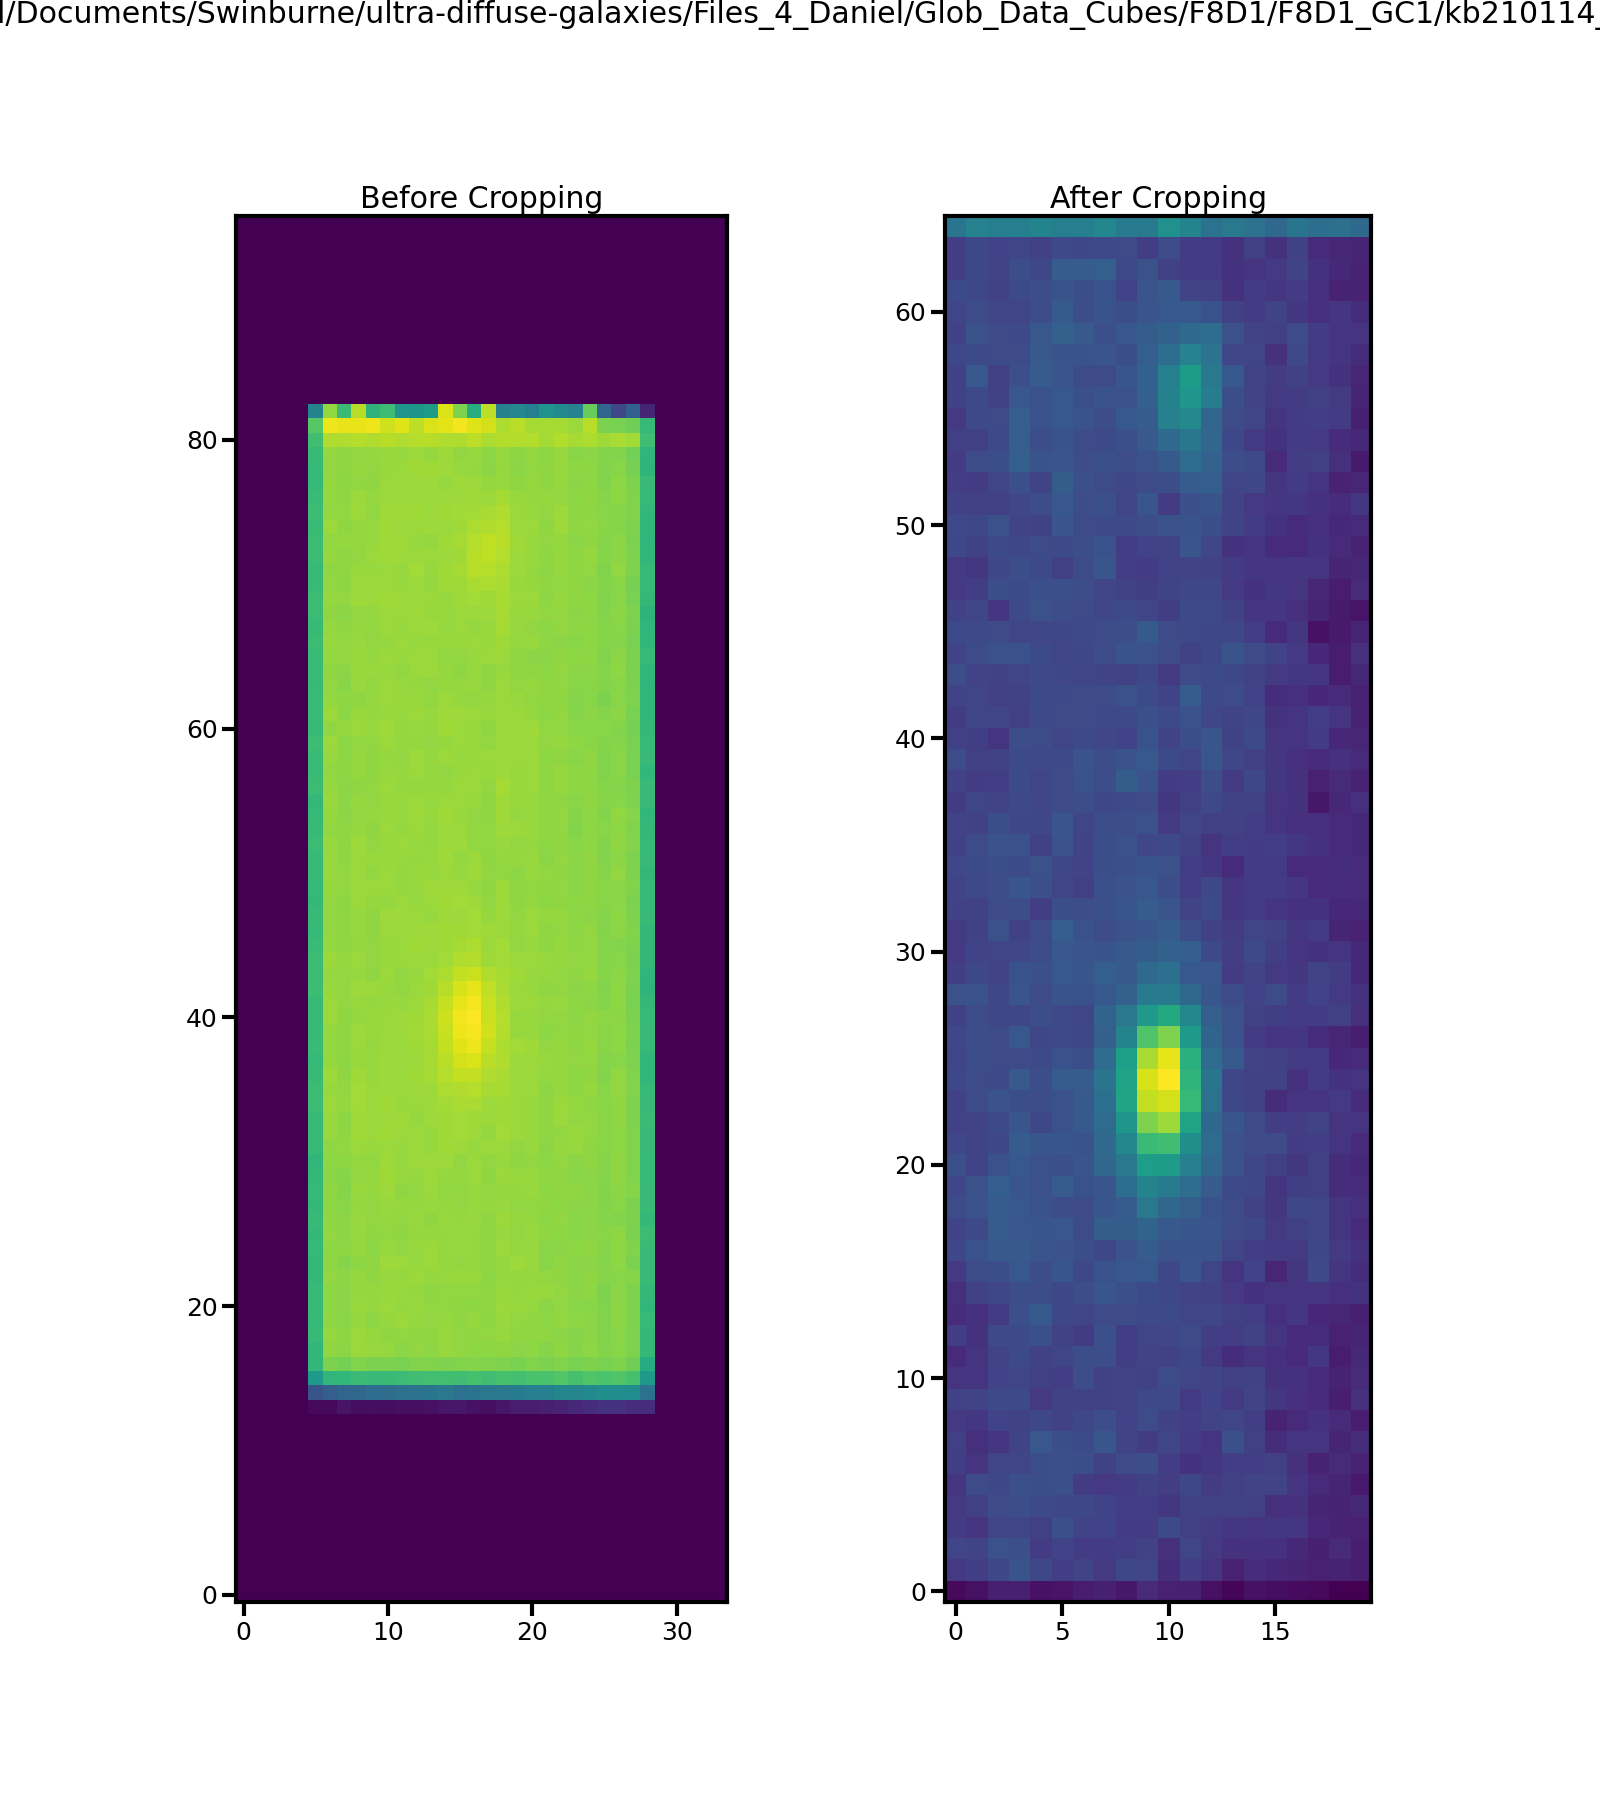

Files Written out
Code Competed Successfully in, 7.16 seconds


In [2]:
""" User inputs """
s1_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/F8D1_GC1/' # path to directory containing spectra
s1_file_keyword = '*kb*ocubes*' # keyword to find files in directory
x_low = 7 # lowest and highest xvalue of the spaxel to be INCLUDED in the rectangle
x_high = 26
y_low = 17 # lowest and highest yvalue of the spaxel to be INCLUDED in the rectangle
y_high = 81

cut_cube(s1_file_directory, s1_file_keyword, x_low, x_high, y_low, y_high)

### step 1.5: extract spectra
open qfitsview and create `.fits` file for all objects in the cut files 

### step 2: barycentric correction

In [3]:
""" User inputs """
s2_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/F8D1/GC/obj1/' # path to directory containing spectra
s2_file_keyword = '[0-9]*.fits' # keyword to find files in directory
corrections = 'auto' # 'manual' or 'automatic'

if corrections == 'manual':
    bary_corr = np.array([0]) # Manual barycentric correction in km/s. One number for each file!
    # INPUT MANUAL ABOVE ^^^^^^
else:
    bary_corr = barycentric_correction(s2_file_directory, s2_file_keyword)
    bary_corr = np.array(bary_corr)
    if np.all(bary_corr > 0):
        bary_corr = -bary_corr
        print('ensured bary_corr is negative')
    
print(f'Barycentric correction: {bary_corr} km/s')
print(f'Delta correction: {np.diff(bary_corr)} km/s')
plt.close()

The Barycentric correction is: 28.093914255118825 km/s
The Barycentric correction is: 28.084414850010386 km/s
The Barycentric correction is: 28.073983910725843 km/s
ensured bary_corr is negative
Barycentric correction: [-28.09391426 -28.08441485 -28.07398391] km/s
Delta correction: [0.00949941 0.01043094] km/s


### step 3: spectra stacking
must run for all objects

list of files: ['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/F8D1/GC/obj1/74.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/F8D1/GC/obj1/75.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/F8D1/GC/obj1/76.fits']
[3583. 3584. 3585. ... 5573. 5574. 5575.]


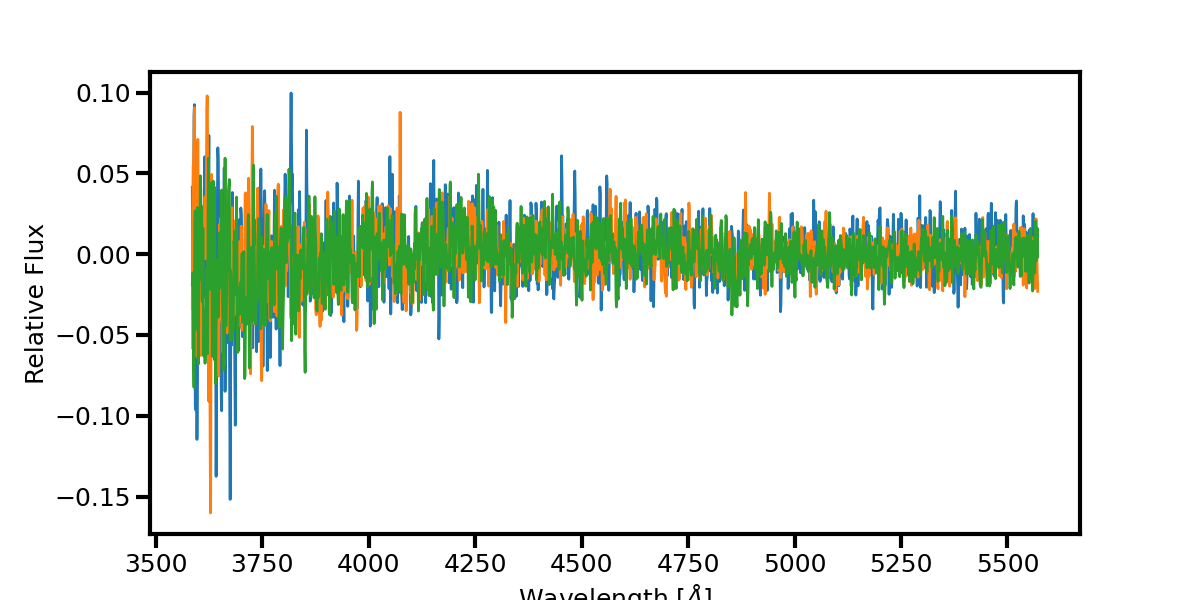

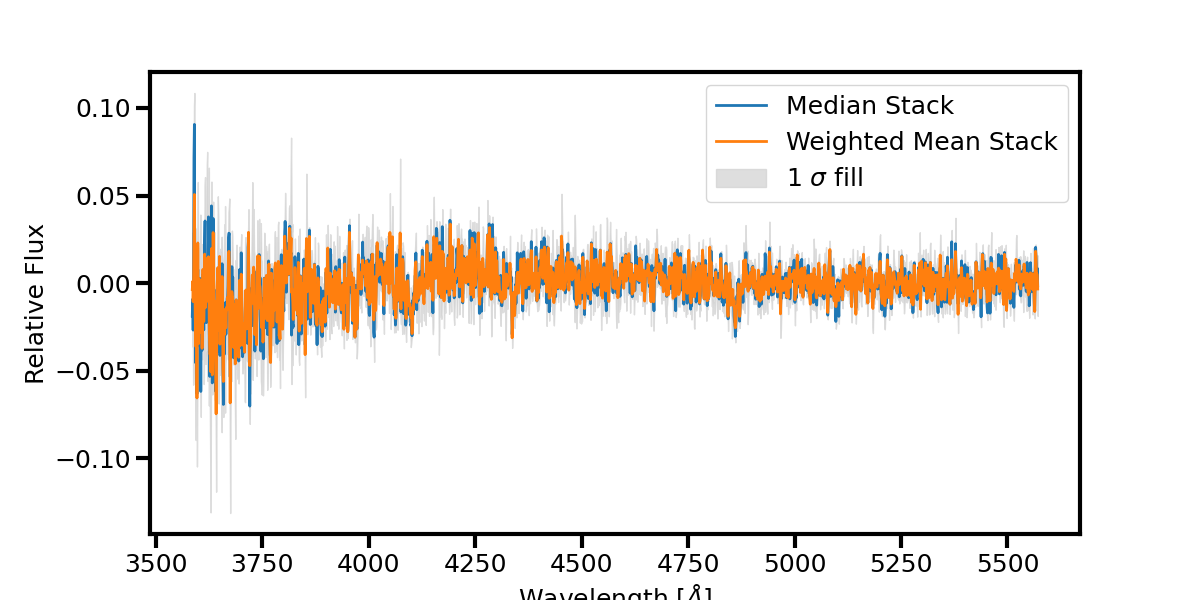

OSError: File '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/F8D1/GC/obj1/mean.fits' already exists.

In [4]:
""" User inputs """
s3_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/F8D1/GC/obj1/' # path to directory containing spectra
s3_file_keyword = '[0-9]*.fits' # keyword to find files in directory
overwrite = False # if True, will overwrite any existing files. Proceed with caution, probably best to set False

plt.close()
spectra_stack(s3_file_directory, s3_file_keyword, bary_corr, overwrite)
# plot 1: spectra
# plot 2: stack

### step 4.1: Check ppxf velocities of degrees

100%|██████████| 30/30 [00:46<00:00,  1.56s/it]


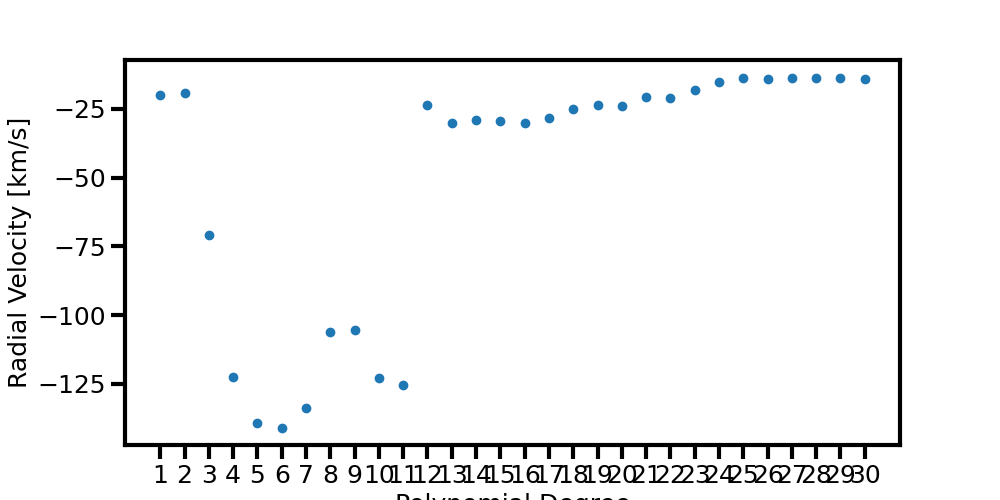

In [5]:
""" User inputs """
ppxf_file = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/F8D1/GC/obj1/mean_NCS.fits' # path to ppxf input file
fwhm_gal = 5000 / 1800 # instrument resolution
min_degrees, max_degrees = 1, 30 # min and max degrees for Legendre polynomials

degrees = np.arange(min_degrees, max_degrees+1) # make a list of numbers to test for degree
velocities = []
for deg in tqdm(degrees):
    vel, sigma, h3, h4 = ppxf_kinematics(ppxf_file, fwhm_gal, deg)
    clear_output(wait=True)
    velocities.append(vel)
plt.close()

plt.figure(figsize=(10, 5))
plt.scatter(degrees, velocities)
plt.xlabel("Polynomial Degree")
plt.ylabel("Radial Velocity [km/s]")
plt.xticks(np.arange(min(degrees), max(degrees)+1, 1.0))
plt.show()

### step 4.2 ppxf with best degree

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      -123       427    -0.119     0.032
chi2/DOF: 4004.; DOF: 1696; degree = 4; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 44; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 1/150
Formal errors:
     dV    dsigma   dh3      dh4
      54      80   0.078    0.14
Elapsed time in pPXF: 0.41 s
Best-fitting redshift z = -0.00041 +/- 0.00018
Signal-to-noise ratio per pixel: 5.14
1.254487548459128 0.24425441933112352


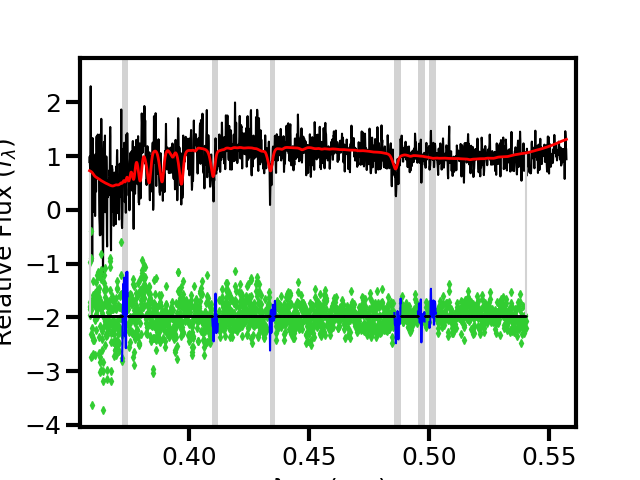

(-122.58660829235569,
 426.7257242390113,
 -0.0004088213205653002,
 0.00017923795702865137)

In [12]:
""" User inputs """
degree = 4

plt.close()
ppxf_kinematics(ppxf_file, fwhm_gal, degree)